In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore')

##  Load data

In [19]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print('Training data-shape:', train_df.shape)
print('Test data_shape:', test_df.shape)
print('\nTraining data coloums:', train_df.columns.tolist())

Training data-shape: (15289, 18)
Test data_shape: (10194, 17)

Training data coloums: ['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield']


In [20]:
# Identify target variable

target_col = 'yield'
print(f'\nTarget variable: {target_col}')


Target variable: yield


# Comprehensive Exploratory Data Analysis

In [21]:
#.1 Basic Dataset Information

print('\nTraining Data Info: ')
print(train_df.info())
print('\nTest Data Info: ')
print(test_df.info())

print('\nTraining Data Description:')
print(train_df.describe())


Training Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 1

In [22]:
# 2. Standardizing Column Names

# Create a dictionary to map old column names to new, cleaner names
column_rename_map = {
    'MaxOfUpperTRange': 'max_upper_trange',
    'MinOfUpperTRange': 'min_upper_trange',
    'AverageOfUpperTRange': 'avg_upper_trange',
    'MaxOfLowerTRange': 'max_lower_trange',
    'MinOfLowerTRange': 'min_lower_trange',
    'AverageOfLowerTRange': 'avg_lower_trange',
    'RainingDays': 'raining_days',
    'AverageRainingDays': 'avg_raining_days',
    
}

# Apply the renaming to both datasets

train_df_clean = train_df.rename(columns = column_rename_map)
test_df_clean = test_df.rename(columns = column_rename_map)

# Remove the 'id' column from both datasets

train_df_clean = train_df_clean.drop(columns=['id'], errors='ignore')
test_df_clean = test_df_clean.drop(columns=['id'], errors='ignore')

print('Original columns:', train_df.columns.tolist())
print('\nCleaned columns:', train_df_clean.columns.tolist())

# Verify the renaming worked correctly

print(f'\nTraining data shape: {train_df_clean.shape}')
print(f'Test data shape: {test_df_clean.shape}')

# Display the cleaned data info

print('\nCleaned training data info:')
print(train_df_clean.info())

Original columns: ['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield']

Cleaned columns: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'max_upper_trange', 'min_upper_trange', 'avg_upper_trange', 'max_lower_trange', 'min_lower_trange', 'avg_lower_trange', 'raining_days', 'avg_raining_days', 'fruitset', 'fruitmass', 'seeds', 'yield']

Training data shape: (15289, 17)
Test data shape: (10194, 16)

Cleaned training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clonesize         15289 non-null  float64
 1   honeybee          15289 non-null  float64
 2   bumbles           15289 non-null  float64
 

In [23]:
# 3. Missing Values Analysis
# Identifying missing values is crucial because they can lead to biased models if not handled properly.
print('Training Data Missing Values:')
missing_train = train_df_clean.isnull().sum()
print(missing_train[missing_train > 0])

print('\nTest Data Missing Values:')
missing_test = test_df_clean.isnull().sum()
print(missing_test[missing_test > 0])

Training Data Missing Values:
Series([], dtype: int64)

Test Data Missing Values:
Series([], dtype: int64)


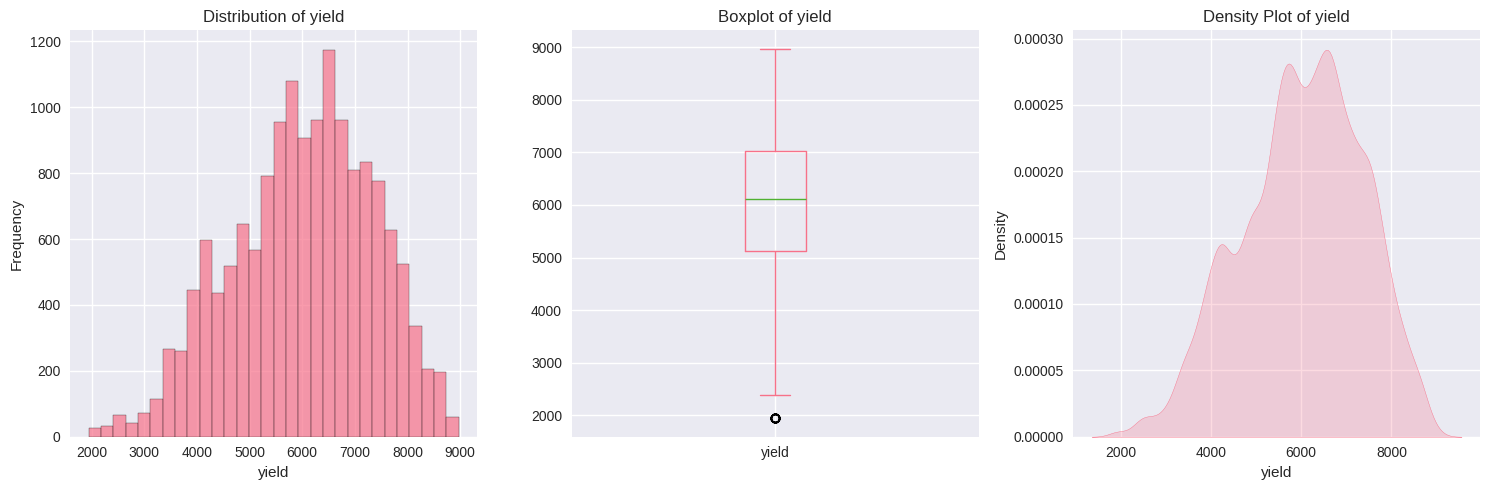


Target Variable Statistics:
Mean: 6025.19
Median: 6117.48
Standard Deviation: 1337.06
Min: 1945.53
Max: 8969.40
Skewness: -0.29


In [24]:
# 4. Target Variable Distribution

 #  We visualize the distribution of the target variable to understand its behavior (normal, skewed, etc.). 
  # This can influence the choice of models and transformations.

# Set style for better plots

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_df_clean[target_col], bins = 30, edgecolor = 'black', alpha = 0.7)
plt.title(f'Distribution of {target_col}')
plt.xlabel(target_col)
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
train_df_clean[target_col].plot(kind = 'box')
plt.title(f'Boxplot of {target_col}')

plt.subplot(1, 3, 3)
sns.kdeplot(train_df_clean[target_col], fill = True)
plt.title(f'Density Plot of {target_col}')

plt.tight_layout()
plt.show()

print(f'\nTarget Variable Statistics:')
print(f'Mean: {train_df_clean[target_col].mean():.2f}')
print(f'Median: {train_df_clean[target_col].median():.2f}')
print(f'Standard Deviation: {train_df_clean[target_col].std():.2f}')
print(f'Min: {train_df_clean[target_col].min():.2f}')
print(f'Max: {train_df_clean[target_col].max():.2f}')
print(f'Skewness: {train_df_clean[target_col].skew():.2f}')  # # High skewness (>2 or <-2) might indicate need for transformation

## Feature Analysis

Number of numerical features: 16
Numerical features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'max_upper_trange', 'min_upper_trange', 'avg_upper_trange', 'max_lower_trange', 'min_lower_trange', 'avg_lower_trange', 'raining_days', 'avg_raining_days', 'fruitset', 'fruitmass', 'seeds']


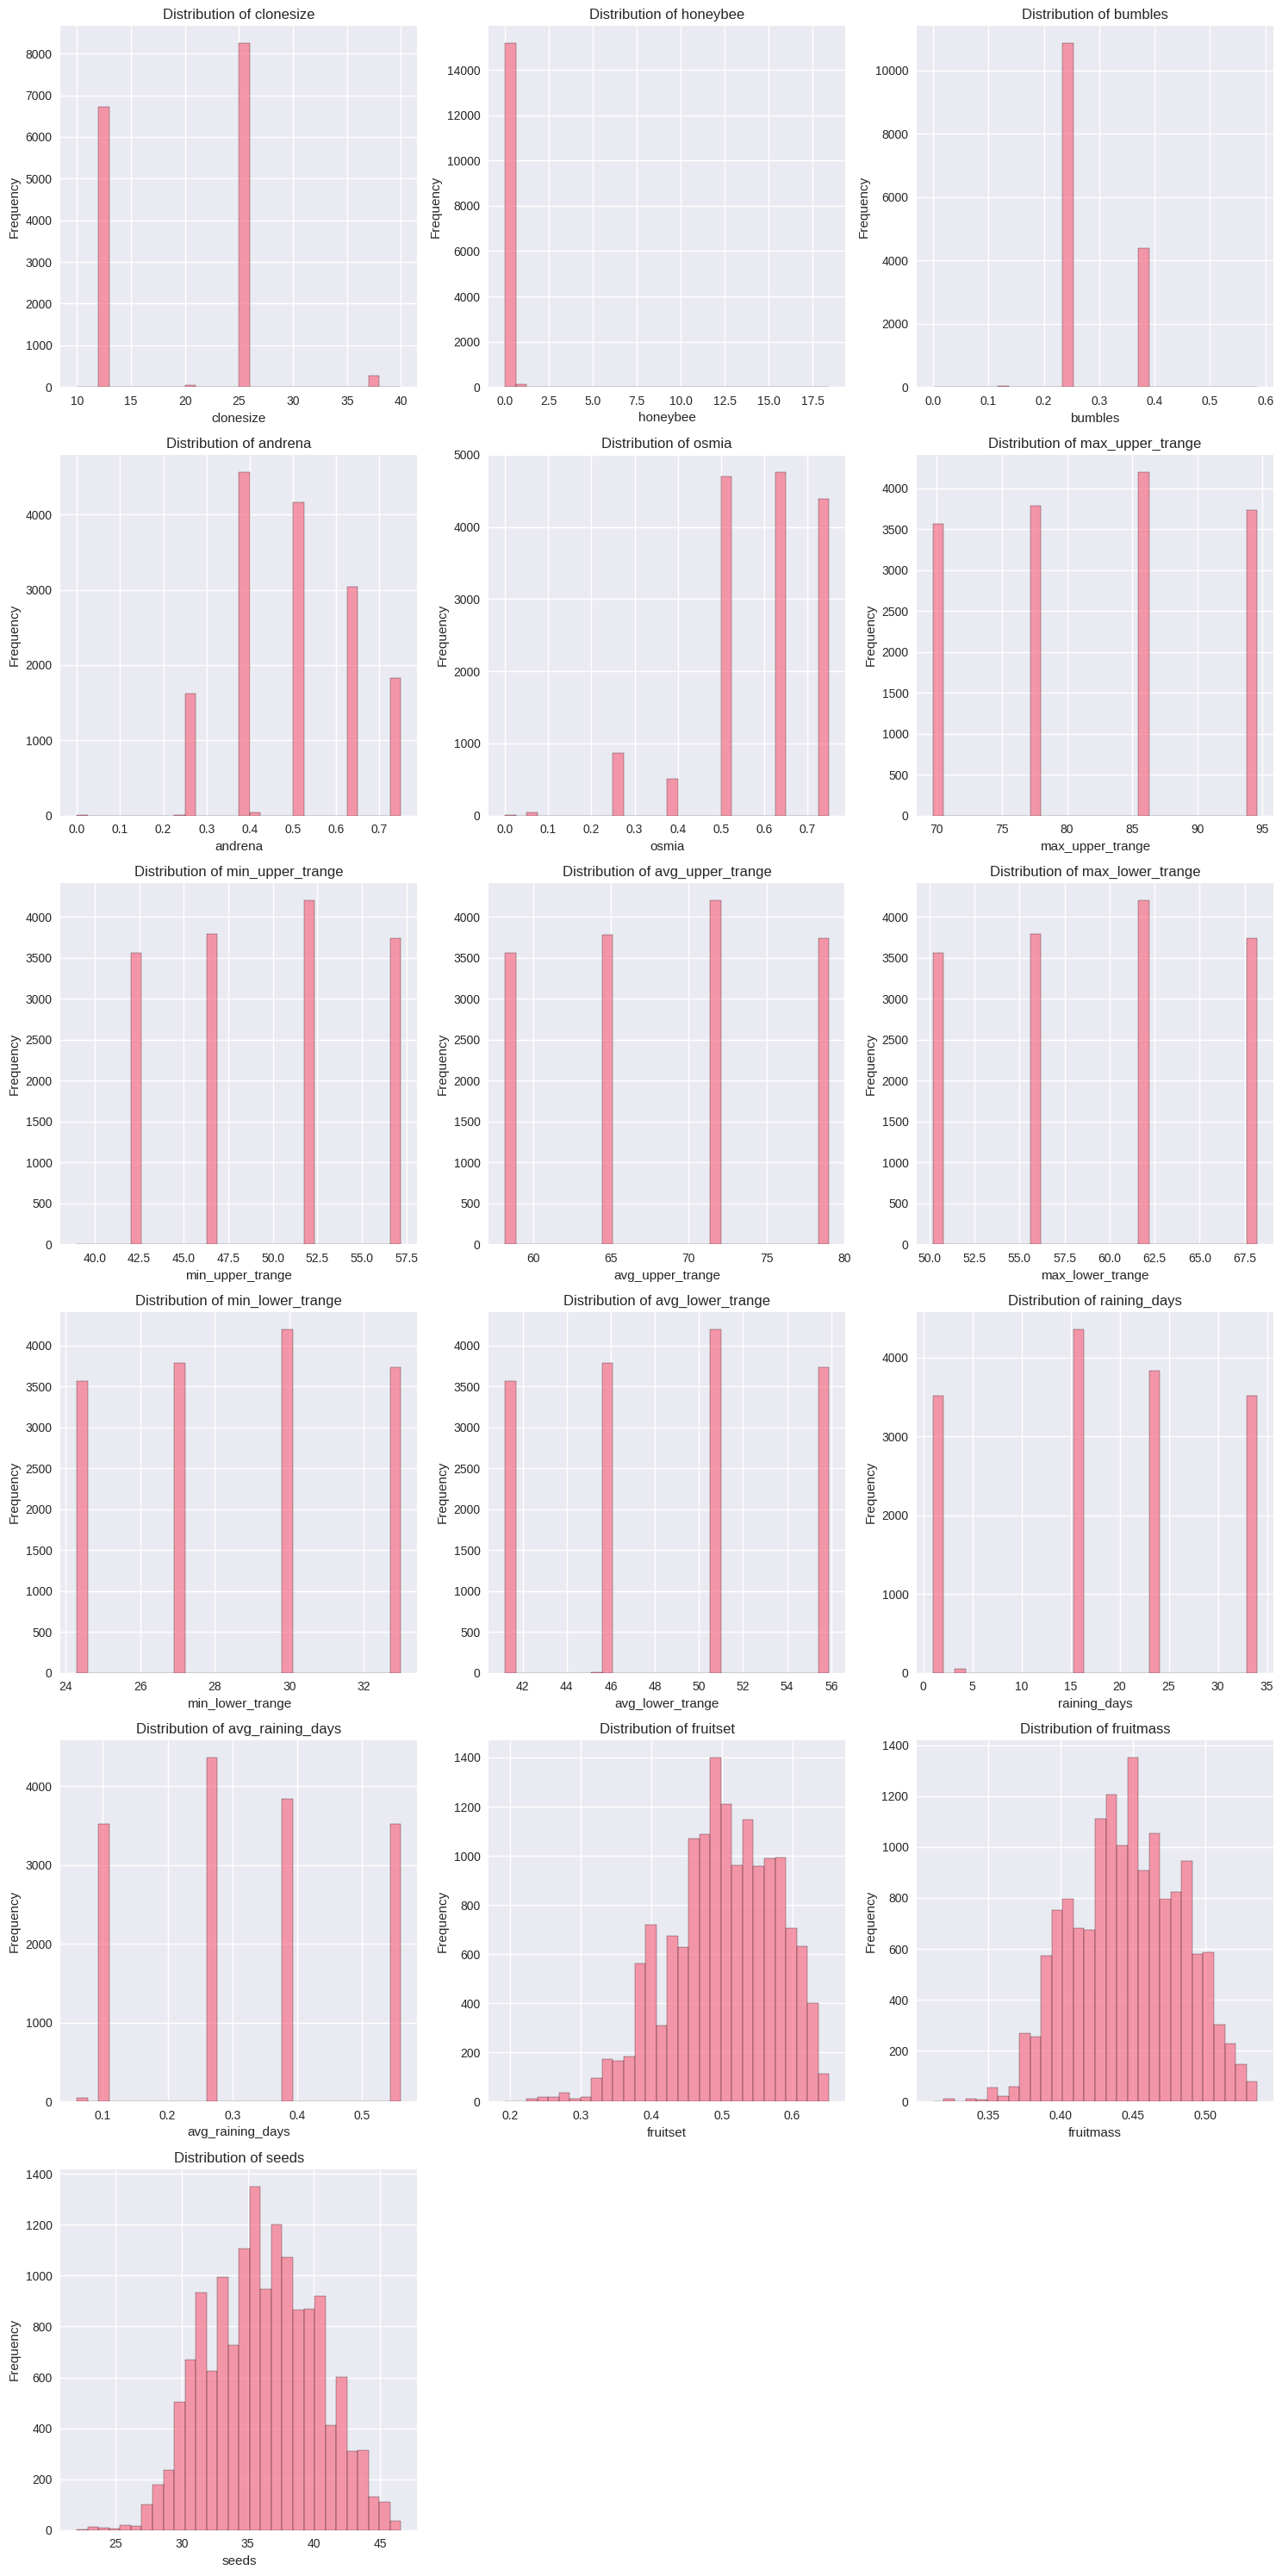

In [25]:
# 5. Numerical Features Analysis
# We separate and analyze numerical and categorical features to apply appropriate preprocessing.
numeric_features = train_df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if col != target_col] 

print(f'Number of numerical features: {len(numeric_features)}')
print(f'Numerical features: {numeric_features}')

if numeric_features:
    
    # Distribution of numerical features
    
    n_cols = 3
    n_rows = (len(numeric_features) + n_cols - 1) // n_cols
    
    plt.figure(figsize = (15, 5 * n_rows))
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.hist(train_df_clean[feature], bins = 30, edgecolor = 'black', alpha = 0.7)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [26]:
# 6. Categorical Features Analysis
# Correlation matrix helps in understanding linear relationships between variables. High correlation between features (multicollinearity) can destabilize linear models.  

categorical_features = train_df_clean.select_dtypes(include = ['object']).columns.tolist()
print(f'Number of categorical features: {len(categorical_features)}')
print(f'Categorical features: {categorical_features}')

if categorical_features:
    
    # Distribution of categorical features
    
    n_cols = 2
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    
    plt.figure(figsize = (15, 5 * n_rows))
    for i, feature in enumerate(categorical_features, 1):
        plt.subplot(n_rows, n_cols, i)
        value_counts = train_df_clean[feature].value_counts()
        if len(value_counts) > 10:  # If too many categories, show top 10
            value_counts = value_counts.head(10)
        value_counts.plot(kind = 'bar')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

Number of categorical features: 0
Categorical features: []


# Correlation and Multicollinearity Analysis

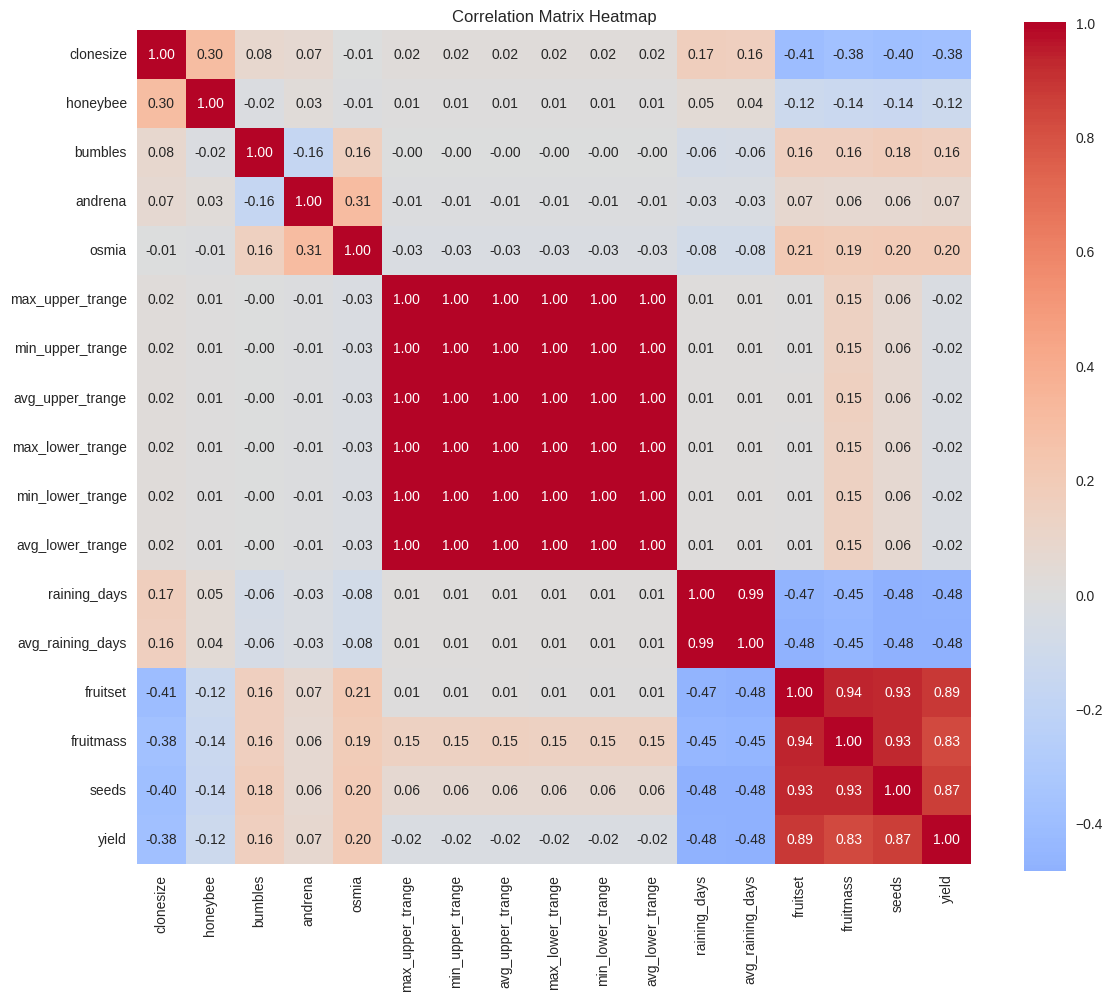


Correlation with Target Variable:
fruitset: 0.886
seeds: 0.869
fruitmass: 0.826
osmia: 0.198
bumbles: 0.161
andrena: 0.074
min_upper_trange: -0.022
avg_upper_trange: -0.022
avg_lower_trange: -0.022
max_lower_trange: -0.022
min_lower_trange: -0.022
max_upper_trange: -0.023
honeybee: -0.118
clonesize: -0.383
raining_days: -0.477
avg_raining_days: -0.484


In [27]:
# 7. Correlation Analysis
# Correlation matrix helps in understanding linear relationships between variables. High correlation between features (multicollinearity) can destabilize linear models.
# Correlation matrix for numerical features

correlation_matrix = train_df_clean[numeric_features + [target_col]].corr()

plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0,
            square = True, fmt = '.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Correlation with target variable

target_correlation = correlation_matrix[target_col].sort_values(ascending = False)
print('\nCorrelation with Target Variable:')
for feature, corr in target_correlation.items():
    if feature != target_col:
        print(f'{feature}: {corr:.3f}')

In [28]:
# 8. Multicollinearity Check using VIF
# VIF (Variance Inflation Factor) quantifies the severity of multicollinearity. A VIF above 10 is often considered high and may require action (e.g., removing features).

def calculate_vif(df, features):
    """Calculate Variance Inflation Factor for features"""
    X = add_constant(df[features].dropna())
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]
    return vif_data

if numeric_features:
    vif_results = calculate_vif(train_df_clean, numeric_features)
    print('\nVariance Inflation Factor (VIF) Analysis:')
    print(vif_results)

     # Identify highly correlated features (VIF > 10 indicates high multicollinearity)
    # # High multicollinearity makes it hard to determine individual feature effects
# VIF > 10 indicates problematic multicollinearity
    high_vif = vif_results[vif_results['VIF'] > 10]
    if len(high_vif) > 0:
        print('\nFeatures with high multicollinearity (VIF > 10):')
        print(high_vif)


Variance Inflation Factor (VIF) Analysis:
             Feature           VIF
0              const    452.702544
1          clonesize      1.376754
2           honeybee      1.120483
3            bumbles      1.151751
4            andrena      1.186737
5              osmia      1.200157
6   max_upper_trange   3414.130675
7   min_upper_trange    559.970976
8   avg_upper_trange  30443.904985
9   max_lower_trange   1105.083282
10  min_lower_trange  24965.147210
11  avg_lower_trange  23062.819227
12      raining_days     55.514009
13  avg_raining_days     56.054862
14          fruitset     11.967936
15         fruitmass     12.726585
16             seeds      9.797380

Features with high multicollinearity (VIF > 10):
             Feature           VIF
0              const    452.702544
6   max_upper_trange   3414.130675
7   min_upper_trange    559.970976
8   avg_upper_trange  30443.904985
9   max_lower_trange   1105.083282
10  min_lower_trange  24965.147210
11  avg_lower_trange  23062.8192

# Relationship Analysis Between Features and Target

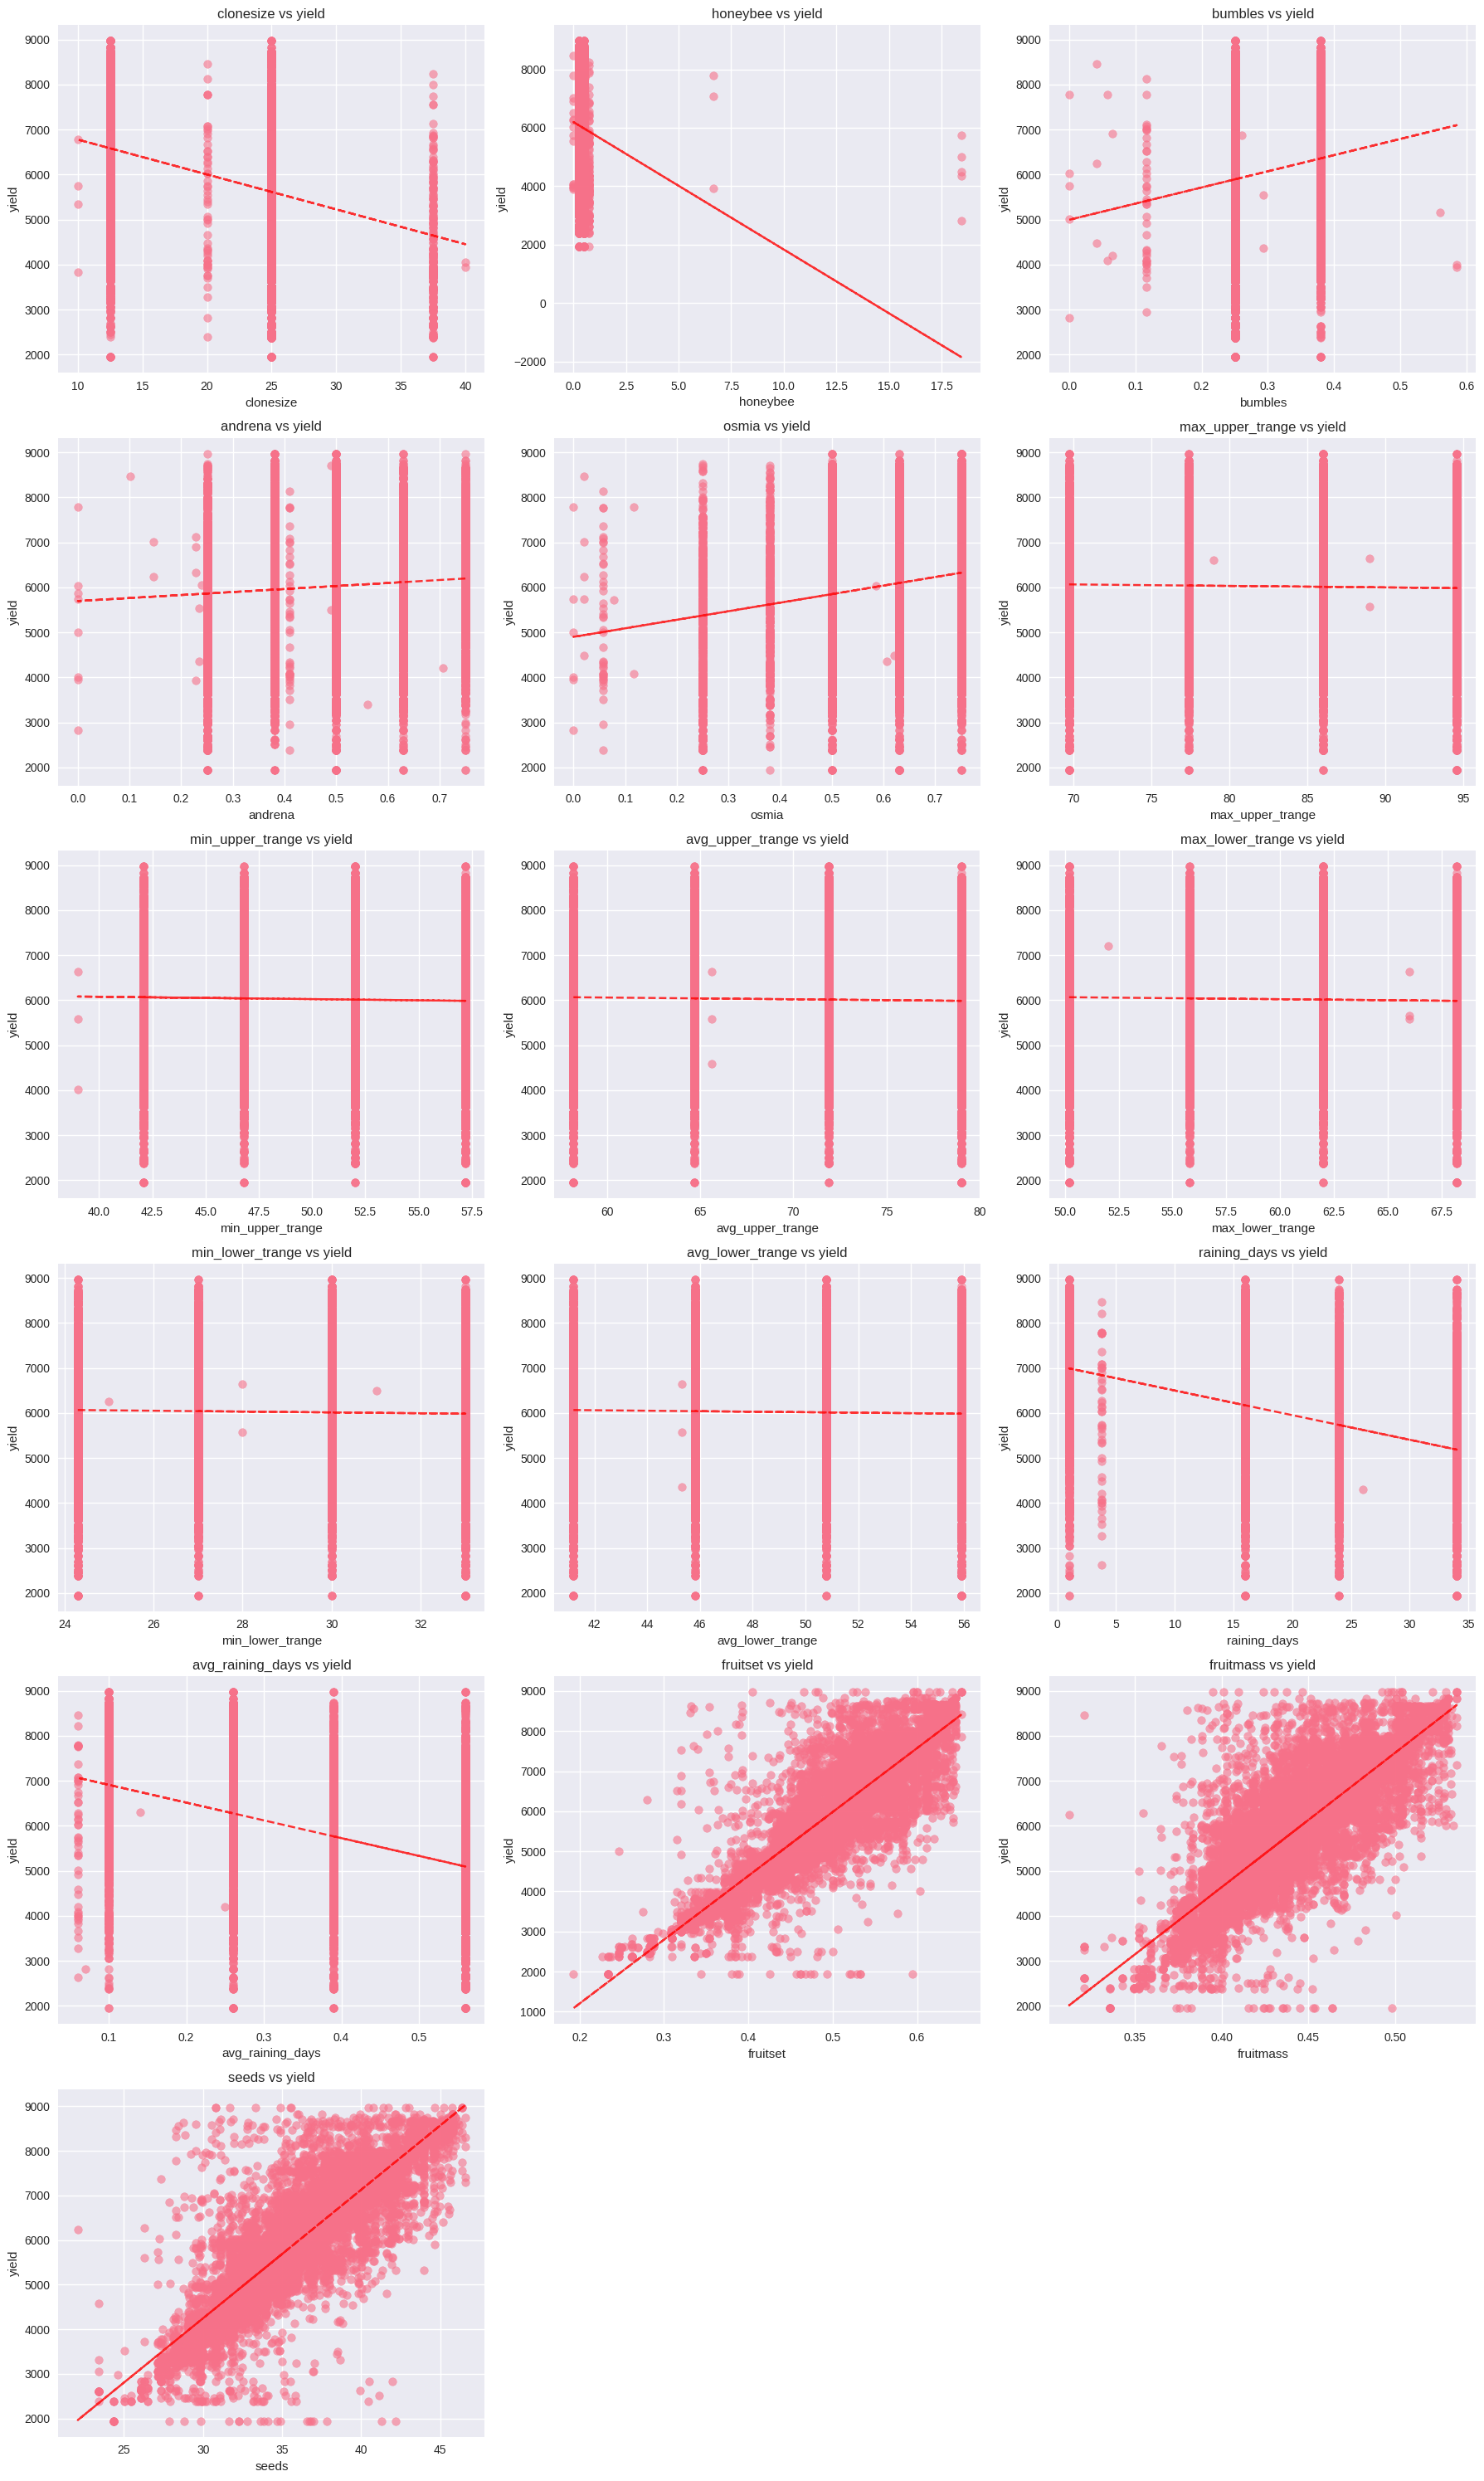

In [29]:

# We plot relationships between each feature and the target variable to identify which features are likely to be important predictors.
# Numerical features vs target

if numeric_features:
    n_cols = 3
    n_rows = (len(numeric_features) + n_cols - 1) // n_cols
    
    plt.figure(figsize = (18, 5 * n_rows))
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.scatter(train_df_clean[feature], train_df_clean[target_col], alpha = 0.6)
        plt.xlabel(feature)
        plt.ylabel(target_col)
        plt.title(f'{feature} vs {target_col}')
        
        # Add trend line
        
        z = np.polyfit(train_df_clean[feature], train_df_clean[target_col], 1)
        p = np.poly1d(z)
        plt.plot(train_df_clean[feature], p(train_df_clean[feature]), "r--", alpha = 0.8)
        
    plt.tight_layout()
    plt.show()

# Categorical features vs target

if categorical_features:
    n_cols = 2
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    
    plt.figure(figsize = (15, 5 * n_rows))
    for i, feature in enumerate(categorical_features, 1):
        plt.subplot(n_rows, n_cols, i)
        
        
        # For categorical variables with too many categories, show top 10
        
        if train_df[feature].nunique() > 10:
            top_categories = train_df_clean[feature].value_counts().head(10).index
            plot_data = train_df_clean[train_df[feature].isin(top_categories)]
        else:
            plot_data = train_df_clean
            
        sns.boxplot(data = plot_data, x = feature, y = target_col)
        plt.title(f'{target_col} by {feature}')
        plt.xticks(rotation = 45)
        
    plt.tight_layout()
    plt.show()

# Data Preparation and Model Implementation

In [30]:
# Prepare features and target
# We split the data into training and validation sets to evaluate the model's performance on unseen data during development.

X = train_df_clean.drop(columns = [target_col])
y = train_df_clean[target_col]


# Identify feature types
# Numerical Features: Impute missing values with the median and scale the features to have zero mean and unit variance. Scaling is important for models that are sensitive to the scale of features (e.g., linear models).
# Median imputation for numerical: Robust to outliers
numeric_features = X.select_dtypes(include = [np.number]).columns.tolist()
categorical_features = X.select_dtypes(include = ['object']).columns.tolist()


print(f'Numerical features: {numeric_features}')
print(f'Categorical features: {categorical_features}')

# Create preprocessing pipelines

numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])
# Categorical Features: Impute missing values with the most frequent category and one-hot encode them. One-hot encoding converts categorical variables into a form that can be provided to ML algorithms.
# Mode imputation for categorical: Preserves most common category
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.2, random_state = 42, shuffle = True
)

print(f'Training set size: {X_train.shape}')
print(f'Validation set size: {X_val.shape}')
print(f'Numerical features: {numeric_features}')
print(f'Categorical features: {categorical_features}')

# Create preprocessing pipelines

numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data for validation

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.2, random_state = 42, shuffle = True
)

print(f'Training set size: {X_train.shape}')
print(f'Validation set size: {X_val.shape}')

Numerical features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'max_upper_trange', 'min_upper_trange', 'avg_upper_trange', 'max_lower_trange', 'min_lower_trange', 'avg_lower_trange', 'raining_days', 'avg_raining_days', 'fruitset', 'fruitmass', 'seeds']
Categorical features: []
Training set size: (12231, 16)
Validation set size: (3058, 16)
Numerical features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'max_upper_trange', 'min_upper_trange', 'avg_upper_trange', 'max_lower_trange', 'min_lower_trange', 'avg_lower_trange', 'raining_days', 'avg_raining_days', 'fruitset', 'fruitmass', 'seeds']
Categorical features: []
Training set size: (12231, 16)
Validation set size: (3058, 16)


# Model Training and Evaluation

In [31]:
# Simple model implementation

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha = 1.0),
    'Random Forest': RandomForestRegressor(n_estimators = 100, random_state = 42)
}

results = {}

for name, model in models.items():
    
    # Create pipeline
    pipeline = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train model
    
    pipeline.fit(X_train, y_train)
    
    # Make predictions 
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_val = pipeline.predict(X_val)
    
    # Calculate MAE
    
    train_mae = mean_absolute_error(y_train, y_pred_train)
    val_mae = mean_absolute_error(y_val, y_pred_val)
    
    results[name] = {
        'model': pipeline,
        'train_mae': train_mae,
        'val_mae': val_mae
    }
    
    print(f'\n{name}:')
    print(f'  Training MAE: {train_mae:.4f}')
    print(f'  Validation MAE: {val_mae:.4f}')

# Select best model based on validation MAE

best_model_name = min(results.keys(), key = lambda x: results[x]['val_mae'])
best_model = results[best_model_name]['model']

print(f'\nBest model: {best_model_name}')
print(f'Best validation MAE: {results[best_model_name]['val_mae']:.4f}')



Linear Regression:
  Training MAE: 371.3599
  Validation MAE: 370.4475

Ridge Regression:
  Training MAE: 371.6586
  Validation MAE: 370.7443

Random Forest:
  Training MAE: 137.3433
  Validation MAE: 362.7834

Best model: Random Forest
Best validation MAE: 362.7834


# Final Model and Predictions

In [32]:
# Train final model on entire dataset

final_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', results[best_model_name]['model'].named_steps['model'])
])

final_pipeline.fit(X, y)

# Make predictions on test data

test_predictions = final_pipeline.predict(test_df_clean)

In [33]:
# Create submission file

submission_df = pd.DataFrame({
    'Id': test_df.index if 'Id' not in test_df.columns else test_df['Id'],
    target_col: test_predictions
})

# Save submission

submission_df.to_csv('submission.csv', index = False)

print("Submission file saved as 'submission.csv'")
print(f'Number of test predictions: {len(test_predictions)}')
print(f'Prediction range: {test_predictions.min():.2f} to {test_predictions.max():.2f}')
print(f'Mean prediction: {test_predictions.mean():.2f}')


Submission file saved as 'submission.csv'
Number of test predictions: 10194
Prediction range: 1949.87 to 8782.22
Mean prediction: 6011.66
